## Поиск наиболее близкого имени участника

### Задание 1

In [1]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein

In [2]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [3]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [7]:
answer = []
for recognized_name in speech_recognition:
    dict_levenshtein = {}
    for real_name in claim_list:
        dict_levenshtein[real_name] = Levenshtein.distance(recognized_name, real_name)
        
    answer.append(sorted(dict_levenshtein.items(), key = lambda x: x[1])[0][0])
print(answer)  

['Кущенко Анна', 'Кущенко Анна', 'Груздева Алина', 'Гречихина Наталья', 'Шехавцова Анна', 'Чистякова Анастасия']


In [69]:
for recognized_name in speech_recognition:
    distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    print(sorted(distances.items(), key = lambda x: x[1])[0][0])   
    

Кущенко Анна
Кущенко Анна
Груздева Алина
Гречихина Наталья
Шехавцова Анна
Чистякова Анастасия


### Задание 2

In [8]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [9]:
digits = datasets.load_digits()

In [10]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

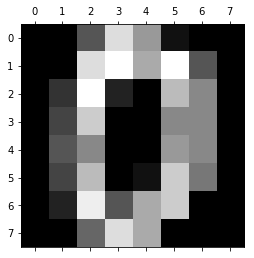

In [13]:
plt.gray()
for i in range(0, 1):
    plt.matshow(digits.images[i])
    
plt.show() 

In [17]:
X_digits = digits.data
Y_digits = digits.target

##### разделение на тренировочную и обучающуюся выборки

In [58]:
split = int( len(X_digits) * .8 )

In [59]:
# X_train = X_digits[:split]
# Y_train = Y_digits[:split]

# X_test = X_digits[split:]
# Y_test = Y_digits[split:]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.2, random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
for i in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train).predict(X_test)
    print(f'n_neighbors={i} - score={knn.score( X_test, Y_test )}')


n_neighbors=1 - score=0.9777777777777777
n_neighbors=3 - score=0.9833333333333333
n_neighbors=5 - score=0.9861111111111112
n_neighbors=7 - score=0.9888888888888889
n_neighbors=9 - score=0.9805555555555555
n_neighbors=11 - score=0.9833333333333333
n_neighbors=13 - score=0.9777777777777777
n_neighbors=15 - score=0.9805555555555555
n_neighbors=17 - score=0.9833333333333333
n_neighbors=19 - score=0.975
n_neighbors=21 - score=0.975
n_neighbors=23 - score=0.9777777777777777
